In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt


In [2]:
# Import the data
file_path = "Resources/lending_data.csv"
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Split the Data into Training and Testing

In [3]:
# Create our features
X = pd.get_dummies(df.drop(columns='loan_status'))

# Create our target
y = df['loan_status']

In [4]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000


In [5]:
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape

(58152, 7)

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
#classifier
classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[18663,   102],
       [   56,   563]], dtype=int64)

In [10]:
confusion_matrix(y, classifier.predict(X))

array([[74657,   379],
       [  237,  2263]], dtype=int64)

In [11]:
# Split the data into X_train, X_test, y_train, y_test
#from sklearn.model_selection import train_test_split
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9918489475856377

In [12]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### random forest classifier

In [13]:
# Train a Logistic Regression model print the model score
# Train a Random Forest Classifier model and print the model score
randomForestClass = RandomForestClassifier(random_state=0)
randomForestClass.fit(X_train, y_train)
print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))


RandomForestClassifier score:  0.9915394139496492


In [14]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.991642591828312


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


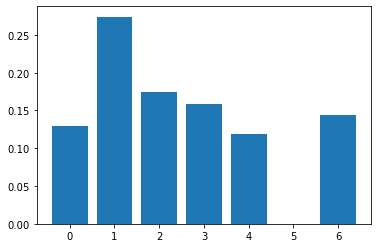

In [15]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [16]:
from sklearn.feature_selection import SelectFromModel

In [17]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()

array([False,  True,  True,  True, False, False,  True])

In [18]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [19]:
clf = LogisticRegression().fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9921240885954051
Testing Score: 0.9918489475856377


In [20]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train the Logistic Regression model on the scaled data and print the model score
logisticRegr_scaled = LogisticRegression(
    solver='lbfgs',
    max_iter=100,
    random_state=0
)
logisticRegr_scaled.fit(X_train_scaled, y_train)
print("LogisticRegressin scaled score: ", logisticRegr_scaled.score(X_test_scaled, y_test))

LogisticRegressin scaled score:  0.9936545604622369


In [22]:
# Train a Random Forest Classifier model on the scaled data and print the model score
randomForestClass_scaled = RandomForestClassifier(random_state=0)
randomForestClass_scaled.fit(X_train_scaled, y_train)
print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

RandomForestClassifier scaled score:  0.9915910028889806
